## Data upload
We have 270 available ticket names, you can choose any from the list. The file goes with the zip.

In [434]:
from __future__ import division
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import plotly.graph_objects as go
from datetime import datetime
import numpy as np


av_stock_tickets = pd.read_csv("tickets.csv", header=1)

def choose_stock_numb(numb):
    return av_stock_tickets.iloc[numb]["ISIN"]

def get_data_request(start, end, engines, markets, boards, sec_name):
        try:
            if end == 0:
                end = datetime.today().strftime('%Y-%m-%d')
            request="http://iss.moex.com/iss/history/engines/"+str(engines)+"/markets/"+str(markets)+"/boards/"+str(boards)+"/securities/"+str(sec_name)+"/candles.json?from="+str(start)+"&till="+str(end)+"&interval=24&start=0"
            if request == None:
                return("There is no data")
            df=pd.read_json(request)
            data=pd.DataFrame(df['history']['data'])
            columns = ["BOARDID", "TRADEDATE", "SHORTNAME", "SECID", "NUMTRADES", "VALUE", "OPEN", "LOW", "HIGH", "LEGALCLOSEPRICE", "WAPRICE", "CLOSE", "VOLUME", "MARKETPRICE2", "MARKETPRICE3", "ADMITTEDQUOTE", "MP2VALTRD", "MARKETPRICE3TRADESVALUE", "ADMITTEDVALUE", "WAVAL"]
            data.columns=columns
            return data
        except ValueError:
            print("Oops! There is no data. Try again...")
            
def plot_low_high(data):
    if data is None:
        return("Oops! There is no data. Try again...")
    else:
        fig = plt.figure(figsize=(7, 5))
        plt.title('Low-High graph')
        plt.plot(data['LOW'], label="Low")
        plt.ylabel('Price Low-High')
        plt.xlabel('Date')
        plt.plot(data['HIGH'], label="High")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.show()
   
def plot_open_close(data):
    if data is None:
        return("Oops! There is no data. Try again...")
    else:
        fig = plt.figure(figsize=(7, 5))
        plt.title('Open-Close graph')
        plt.ylabel('Price Low-High')
        plt.xlabel('Date')
        plt.plot(data['OPEN'], label="Open")
        plt.plot(data['LEGALCLOSEPRICE'], label="Close")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.show()   

def plot_mov_av(data, window, vol):
    data['sma'] = data['LEGALCLOSEPRICE'].rolling(window=window, min_periods=0).mean() 
    fig = plt.figure(figsize=(7, 5))
    plt.title('Mov Av graph '+str(window))
    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False
    plt.plot(data.index, data['LEGALCLOSEPRICE']) 
    plt.plot(data.index, data['sma']) 
    if vol == 1:
        fig = plt.figure(figsize=(7, 1))
        data["VOLUME"].plot.bar()
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.show()

def plot_candle(data):
    df = data[["TRADEDATE","OPEN","HIGH","LEGALCLOSEPRICE","LOW"]]
    fig = go.Figure(data=[go.Candlestick(x=df["TRADEDATE"],
                    open=df["OPEN"],
                    high=df["HIGH"],
                    low=df["LOW"],
                    close=df["LEGALCLOSEPRICE"])])
    fig.update_layout(
    title="Candlestick chart",
    yaxis_title="Price")
    fig.show()
    
def get_plot_RSI(data, n, doplot):
    delta = data['LEGALCLOSEPRICE'].diff()
    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0
    RolUp = dUp.rolling(window=n, min_periods=0).mean() 
    RolDown = dDown.rolling(window=n, min_periods=0).mean().abs()
    RS = RolUp / RolDown
    
    if doplot ==1:
        data.set_index(pd.to_datetime(data['TRADEDATE']))
        fig = plt.figure(figsize=(7, 5))
        plt.title('RSI graph')
        plt.plot(rescale(list(RS.dropna())), label="RSI")
        plt.ylabel('RSI')
        plt.xlabel('Date')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.show()

def rescale(values, new_min = 0, new_max = 100):
    output = []
    old_min, old_max = min(values), max(values)
    for v in values:
        new_v = (new_max - new_min) / (old_max - old_min) * (v - old_min) + new_min
        output.append(new_v)
    return output

## Graphs and analytics

Below we will explore 2 tickets, sberbank and moex.

### 1 stock (SBER)

In [233]:
# Initialize the plot with the specified dimensions.

company = "SBER"
# If you have no idea, what are the ticket names, you can choose random number below and work with the ticket
# company = choose_stock_numb(31)

data_1 = get_data_request("2013-01-01",0, "stock", "shares", "TQBR", company)
data_1.head()

,BOARDID,TRADEDATE,SHORTNAME,SECID,NUMTRADES,VALUE,OPEN,LOW,HIGH,LEGALCLOSEPRICE,WAPRICE,CLOSE,VOLUME,MARKETPRICE2,MARKETPRICE3,ADMITTEDQUOTE,MP2VALTRD,MARKETPRICE3TRADESVALUE,ADMITTEDVALUE,WAVAL
0,TQBR,2013-03-25,Сбербанк,SBER,140,59340002.8,96.00,96.00,101.14,98.66,99.95,98.79,593680,99.99,99.99,99.99,8.572434e+09,8.572434e+09,8.572434e+09,None
1,TQBR,2013-03-26,Сбербанк,SBER,183,126030358.8,98.58,97.08,99.31,97.13,98.19,97.20,1283550,97.82,97.82,97.82,1.221847e+10,1.221847e+10,1.221847e+10,None
2,TQBR,2013-03-27,Сбербанк,SBER,176,121835900.2,97.90,95.39,98.00,96.73,96.55,96.75,1261950,96.45,96.45,96.45,1.251981e+10,1.251981e+10,1.251981e+10,None
3,TQBR,2013-03-28,Сбербанк,SBER,299,192469794.9,96.38,95.72,98.66,98.64,97.63,98.59,1971410,97.74,97.74,97.74,1.257281e+10,1.257281e+10,1.257281e+10,None
4,TQBR,2013-03-29,Сбербанк,SBER,121,77268860.1,98.60,98.32,99.09,98.83,98.81,98.76,782000,98.77,98.77,98.77,2.611474e+09,2.611474e+09,2.611474e+09,None


## Low-High and Open-Close plot

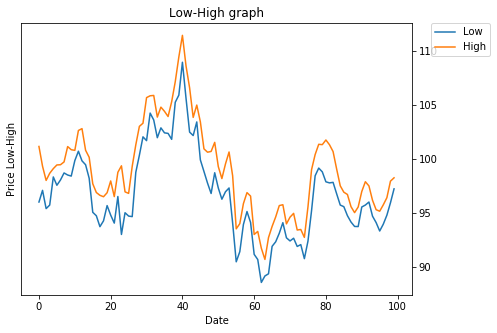

In [288]:
plot_low_high(data_1)

### Comment:
text

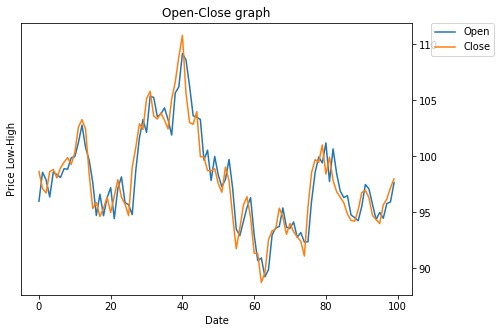

In [289]:
plot_open_close(data_1)

### Comment:
text

## SMA (Moving average) 200, 50

SMA 200


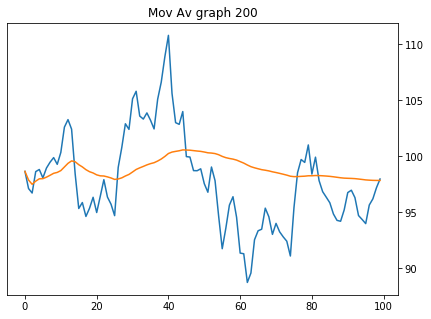

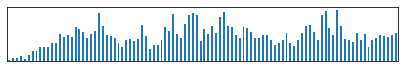

SMA 50


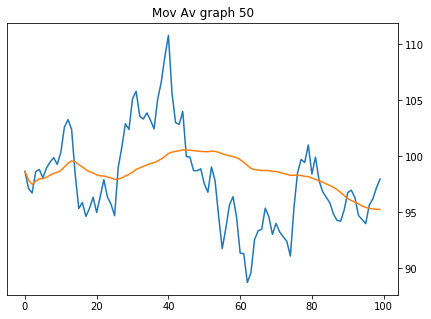

In [304]:
print("SMA 200")
plot_mov_av(data_1, 200, 1)
print("SMA 50")
plot_mov_av(data_1, 50, 0)

### Comment:
text

## Candle chart

In [298]:
plot_candle(data_1)

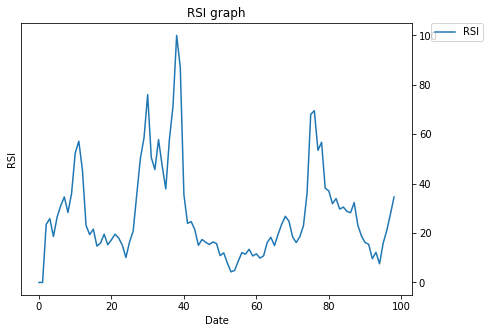

In [436]:
get_plot_RSI(data_1, 14, 1)

## 2 stock (MOEX)

In [427]:
company = "MOEX"
# If you have no idea, what are the ticket names, you can choose random number below and work with the ticket
# company = choose_stock_numb(31)

data_2 = get_data_request("2013-01-01",0, "stock", "shares", "TQBR", company)
data_2.head()

,BOARDID,TRADEDATE,SHORTNAME,SECID,NUMTRADES,VALUE,OPEN,LOW,HIGH,LEGALCLOSEPRICE,WAPRICE,CLOSE,VOLUME,MARKETPRICE2,MARKETPRICE3,ADMITTEDQUOTE,MP2VALTRD,MARKETPRICE3TRADESVALUE,ADMITTEDVALUE,WAVAL
0,TQBR,2013-04-04,МосБиржа,MOEX,97,10148463.2,47.95,47.70,48.65,48.13,48.12,48.13,210880,48.18,48.18,48.18,18915589.9,18915589.9,18915589.9,None
1,TQBR,2013-04-05,МосБиржа,MOEX,146,16698661.4,48.15,47.47,48.76,48.13,48.29,47.69,345780,48.25,48.25,48.25,22663226.9,22663226.9,22663226.9,None
2,TQBR,2013-04-08,МосБиржа,MOEX,101,10889442.1,48.07,47.51,48.08,47.52,47.79,47.54,227840,47.79,47.79,47.79,16169507.6,16169507.6,16169507.6,None
3,TQBR,2013-04-09,МосБиржа,MOEX,170,20233800.0,47.61,47.42,47.80,47.45,47.61,47.48,425000,47.60,47.60,47.60,30226869.9,30226869.9,30226869.9,None
4,TQBR,2013-04-10,МосБиржа,MOEX,57,6624780.0,47.37,46.96,47.44,46.88,47.29,46.96,140100,47.25,47.25,47.25,26661295.1,26661295.1,26661295.1,None


##  Low-High and Open-Close plot

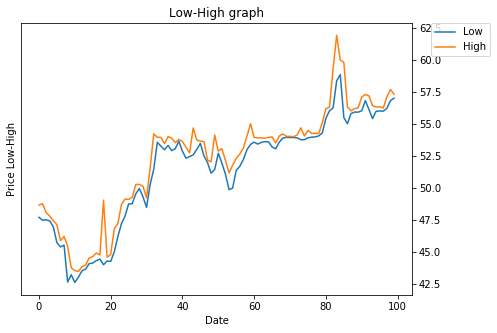

In [428]:
plot_low_high(data_2)

### Comment:
text

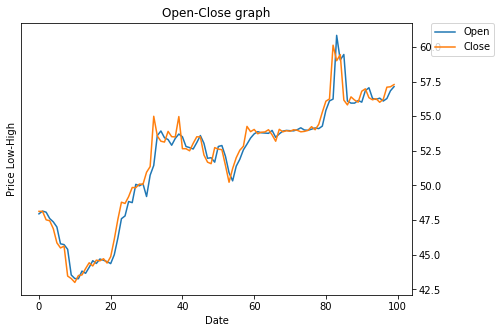

In [429]:
plot_open_close(data_2)

### Comment:
text

## SMA (Moving average) 200, 50

SMA 200


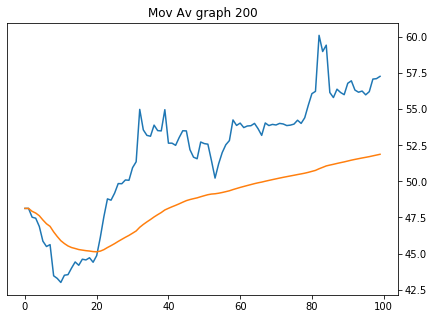

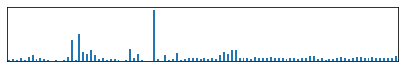

SMA 50


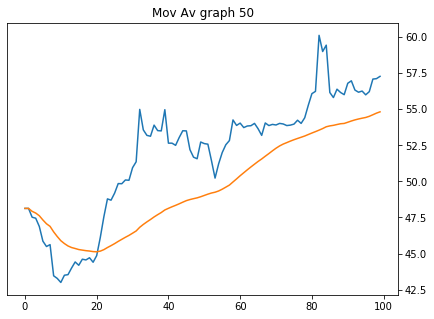

In [425]:
print("SMA 200")
plot_mov_av(data_2, 200, 1)
print("SMA 50")
plot_mov_av(data_2, 50, 0)

### Comment:
text

## Candle chart

In [306]:
plot_candle(data_2)

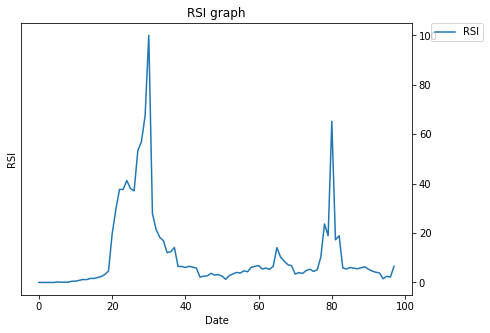

In [435]:
get_plot_RSI(data_2, 14, 1)